# <center> Telecom Service User Classification

In [5]:
# Import libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##  About the data set
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible service categories that correspond to the four customer groups, as follows:

* Basic Service
* E-Service
* Plus Service
* Total Service

Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.

## Load Data

In [6]:
# Load the data
sys.path.append(os.path.abspath('..')) # So we can import from src
from src.data_loader import load_data_from_url
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = load_data_from_url(url)
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis


In [7]:
df.isnull().sum() # Check for missing values

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [26]:
# Class-wise distribution
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Hence, we can say that we have records of 281 customers who opt for Plus Services, 266 for Basic-services, 236 for Total Services, and 217 for E-Services. It can thus be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias.

We can also visualize the correlation map of the data set to determine how the different features are related to each other.

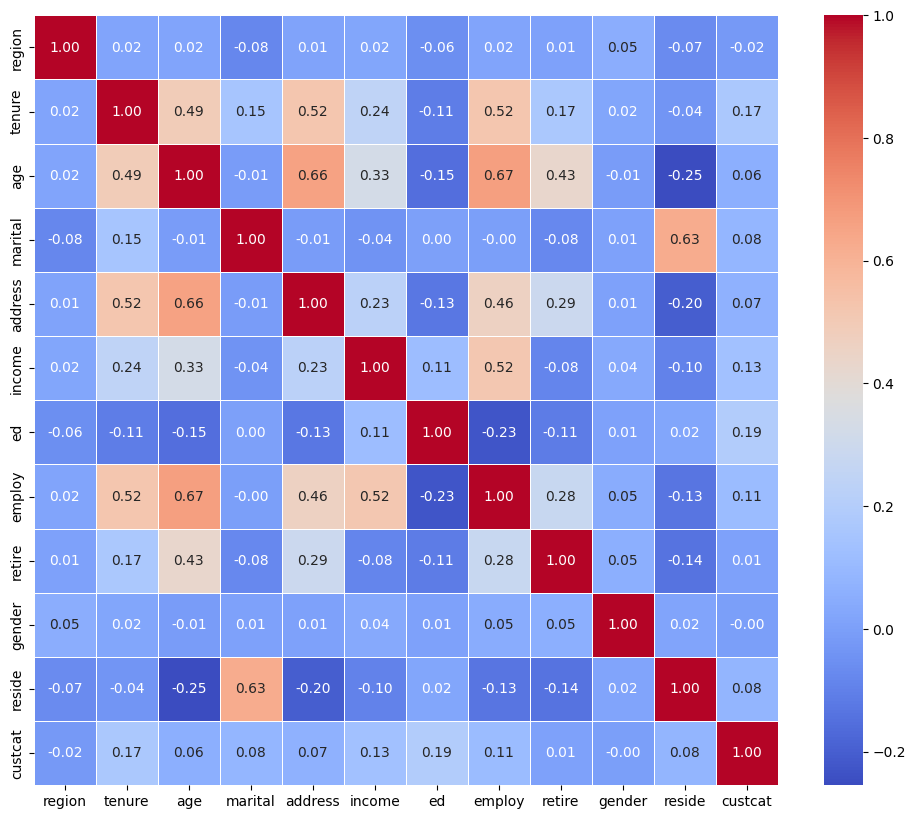

In [36]:
# Correlation map
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


As is visible from the correlation map, some features have beeter correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. custcat with all the other features. This will help us identify which features should be focussed on for modeling and which ones can be ignored.

The following code snippet will give us a list of features sorted in the descending order of their absolute correlation values with respect to the target field.

In [37]:
# features sorted in the descending order of their absolute correlation values with respect to the target field
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values


ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

This shows us that the features retire and gender have the least effect on custcat while ed and tenure have the most effect.

## Separate the input and target features

In [38]:
# separate the data into the input data set and the target data set
X = df.drop('custcat', axis=1)
y = df['custcat']

## Normalize Data

Data normalization is important for the KNN model. 

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [40]:
#Normalize the data
X_norm = StandardScaler().fit_transform(X)

## Train Test Split

In [42]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

## KNN Classification Training and Predicting

In [43]:
# KNN Classifier
K = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

In [44]:
# Predicting the test set results
y_pred = knn_model.predict(X_test)

## Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.



In [47]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.315 

Confusion Matrix: 
 [[30  5 12  4]
 [ 9 14  9 12]
 [25 12 11  6]
 [21 14  8  8]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.35      0.59      0.44        51
           2       0.31      0.32      0.31        44
           3       0.28      0.20      0.23        54
           4       0.27      0.16      0.20        51

    accuracy                           0.32       200
   macro avg       0.30      0.32      0.30       200
weighted avg       0.30      0.32      0.30       200



## Choosing the correct value of k

K in KNN, is the number of nearest neighbors to examine. However, the choice of the value of 'k' clearly affects the model. Therefore, the appropriate choice of the value of the variable k becomes an important task. The general way of doing this is to train the model on a set of different values of k and noting the performance of the trained model on the testing set. The model with the best value of accuracy_score is the one with the ideal value of the parameter k.

Check the performance of the model for 10 values of k, ranging from 1-9. You can evaluate the accuracy along with the standard deviation of the accuracy as well to get a holistic picture of the model performance.

In [54]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

## Plot the model accuracy for a different number of neighbors.¶
Now, you can plot the model accuracy and the standard deviation to identify the model with the most suited value of k.

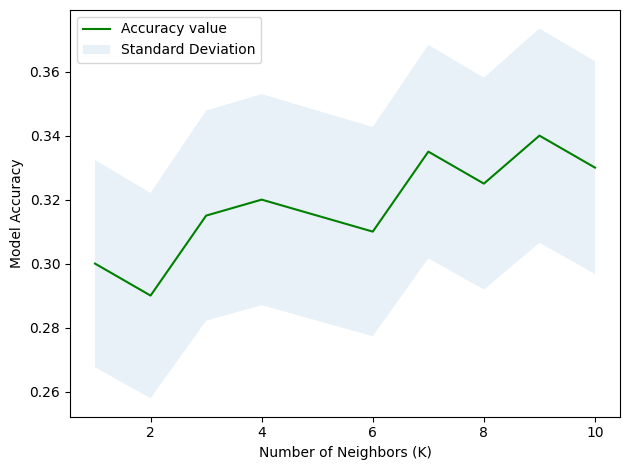

In [55]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

However, since this graph is still rising, there can be a chance that the model will give a better performance with an even higher value of k.

The weak performance on the model can be due to multiple reasons. 
1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation. 
2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN. 
3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.